In [72]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from constants import *
import math
import seaborn as sns
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import dill
dill.load_session('../Weights/HMM_GaussianHMM_5points_TE.db')

In [73]:
list_k = range(2,len(X_i_K_ARRAYS)+2)
BIC_scores = []
for idx in range(len(X_i_K_ARRAYS)):
    model = HMM_K_ARRAYS[idx]
    X = X_i_K_ARRAYS[idx]
    BIC_scores.append(BIC_array(model,X))

In [74]:
for idx,i in enumerate(BIC_scores):
    print(idx+2,i)

2 -9841.77719366
3 -6338.97855373
4 -3372.4215528
5 -116.600473917
6 1371.71503846
7 3402.82099814
8 4815.03646201
9 5937.60901221


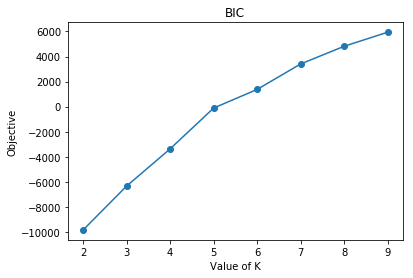

In [75]:
plot_BIC(list_k,BIC_scores)

In [70]:
def plot_cluster(X,count):
    fig = plt.subplot(111)
    axes = plt.gca()
    axes.set_ylim([0,1])
    var_plot_list = ['TE0','TE1','TE2','TE3','TE4']#['cdRPKM0','cdRPKM1','cdRPKM2','cdRPKM3','cdRPKM4']
    total=0
    for i in range(len(X)):
        fig.plot(var_plot_list, X[i])
        total+=1
    title = "HMM "+ str(count)+" : " + str(total) + " points "
    plt.title(title)
    plt.savefig('RPKMoutput/Clusters/5points/TE/HMM'+str(count)+'.png')
    plt.show()

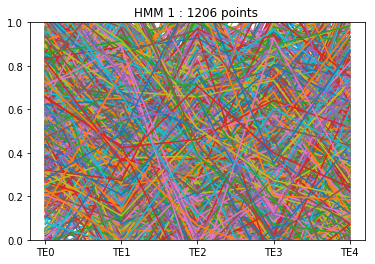

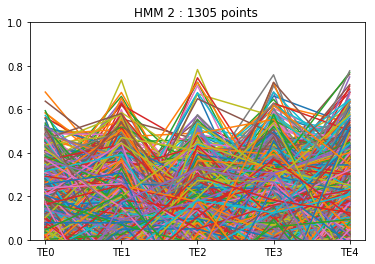

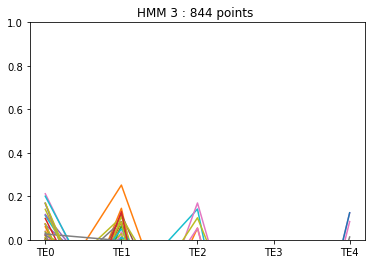

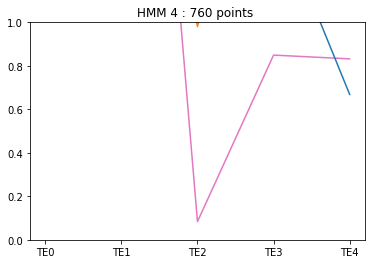

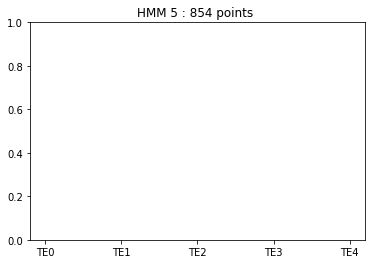

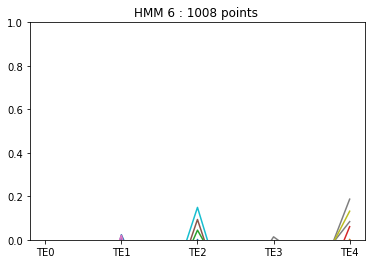

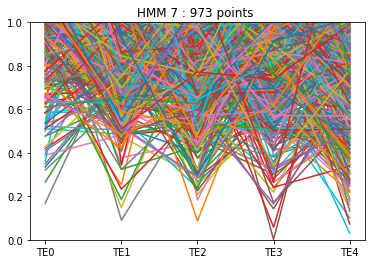

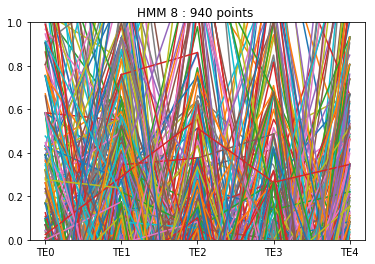

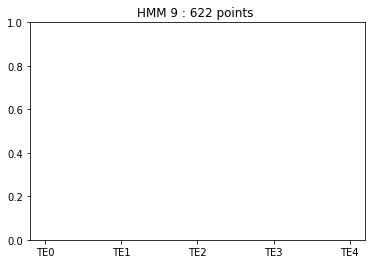

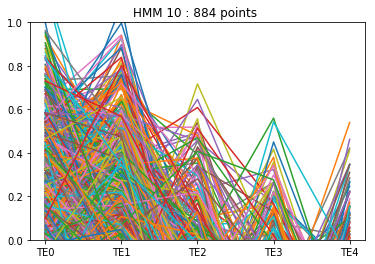

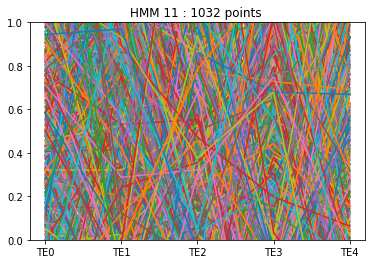

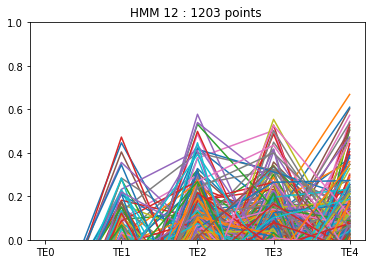

In [71]:
for idx,X in enumerate(X_i_K_ARRAYS[10]):
    plot_cluster(X,idx+1)

In [55]:
def plot_heatmap(X,idx):
    plt.figure()
    sns.heatmap(X,vmin=0, vmax=10)
    plt.title('Heatmap'+str(idx))
    plt.savefig('RPKMoutput/Clusters/5points/TE/Heatmap'+str(idx+1)+'.png')
    plt.show()

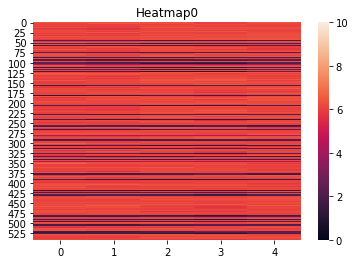

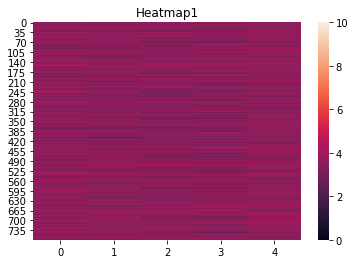

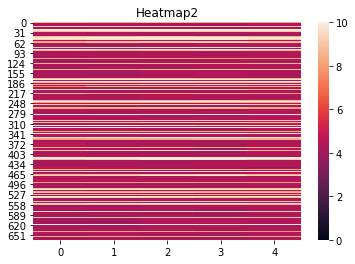

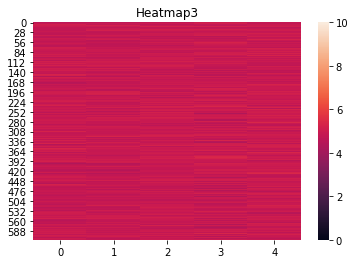

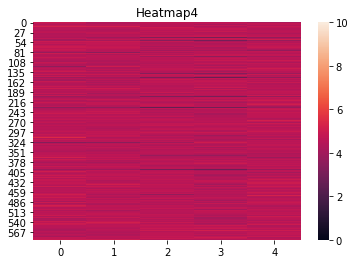

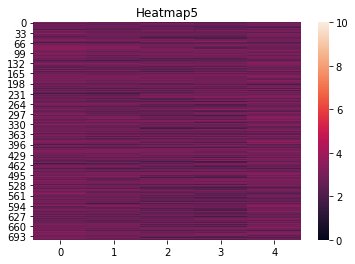

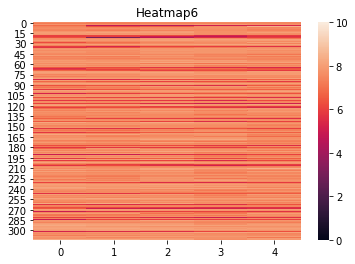

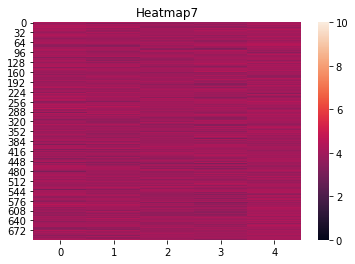

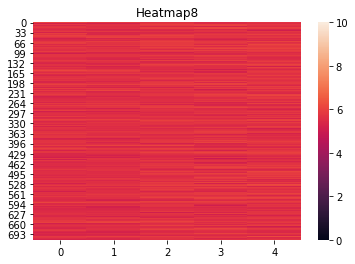

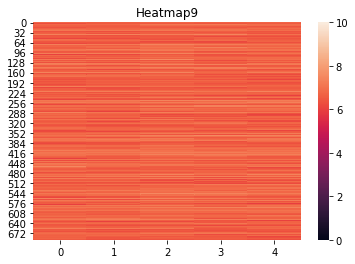

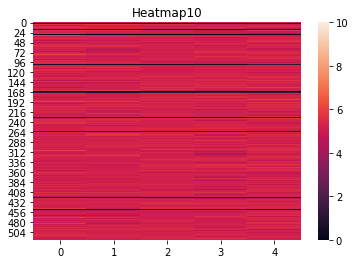

In [56]:
for idx,X in enumerate(X_i_K_ARRAYS[9]):
    plot_heatmap(X,idx)

In [78]:
X_model=X_i_K_ARRAYS[0]

In [79]:
df = pd.read_csv('RPKMOutput/TE.txt', sep=" ", na_values=['-'])
df = df.dropna()
df = df[['AccNum','GeneName','TE0','TE1','TE2','TE3','TE4']]

In [80]:
df.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4
0,NM_017847,ODR4,0.402876,0.423419,0.376029,0.324653,0.415723
1,NM_001143986,TLE6,0.749349,1.270257,0.389269,1.201215,0.953718
2,NM_001003803,ATP5S,0.268285,0.265275,0.190066,0.165385,0.268997
3,NM_001003800,BICD2,1.163660,1.257195,1.319496,1.099945,1.220482
4,NM_016649,ESF1,0.184622,0.211709,0.063296,0.138602,0.244543


In [81]:
# df[['TE0','TE1','TE2','TE3','TE4']] = df[['TE0','TE1','TE2','TE3','TE4']].apply(lambda x: np.log2(x))


In [82]:
for idx,x in enumerate(X_model):
    genes=[]
    acc_nums=[]
    for row in x:
        temp = (df.loc[(df['TE0'] == row[0])& (df['TE1']== row[1]) & (df['TE2']== row[2]) & (df['TE3']== row[3]) & (df['TE4']== row[4])])
        if(not temp.empty):
            genes.append(temp['GeneName'].values[0])
            acc_nums.append(temp['AccNum'].values[0])
    print(len(x),len(genes))
    with open('RPKMoutput/Clusters/5points/TE/GO/Gene'+str(idx+1)+'.txt','w') as f:
        for gene in genes:
            f.write("%s\n" % gene)
    with open('RPKMoutput/Clusters/5points/TE/GO/AccNum'+str(idx+1)+'.txt','w') as f:
        for acc_num in acc_nums:
            f.write("%s\n" % acc_num)

3498 3498


FileNotFoundError: [Errno 2] No such file or directory: 'RPKMoutput/Clusters/5points/TE/GO/Gene1.txt'